<Axes: ylabel='Count'>

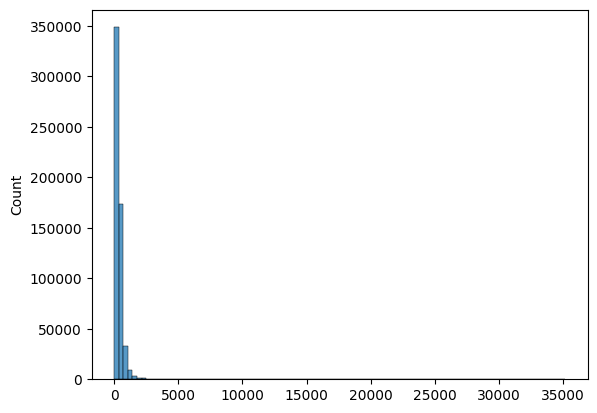

In [1]:
from Bio import SeqIO
import seaborn as sns

records = list(SeqIO.parse("../data/swissprot/uniprot_sprot.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
sns.histplot(seq_lens, bins=100)

In [5]:
import numpy as np

seq_lens = np.array(seq_lens)
(seq_lens <= 1022).sum(), len(seq_lens), (seq_lens <= 1022).sum() / len(seq_lens)

(552778, 570830, 0.9683758737277298)

In [6]:
# filter out sequences longer than 1022 and shorter than 10
import numpy as np
from Bio import SeqIO

records = list(SeqIO.parse("../data/swissprot/uniprot_sprot.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
seq_lens = np.array(seq_lens)
mask = (seq_lens <= 1022) & (seq_lens >= 10)
records = [record for record, m in zip(records, mask) if m]
SeqIO.write(records, "../data/swissprot/uniprot_sprot_10_1022.fasta", "fasta")
len(records)

551965

In [7]:
records = list(SeqIO.parse("../data/swissprot/uniprot_sprot_10_1022.fasta", "fasta"))
seqs = [str(record.seq) for record in records]
seq_lens = [len(seq) for seq in seqs]
seq_lens = np.array(seq_lens)
print(max(seq_lens), min(seq_lens), len(records))
(seq_lens < 10).sum()

1022 10 551965


0

<Axes: ylabel='Count'>

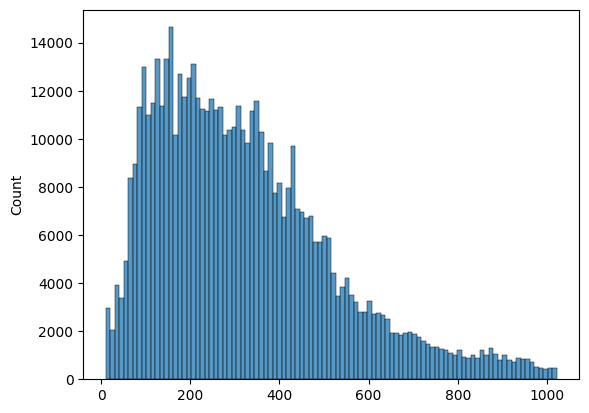

In [8]:
import seaborn as sns
sns.histplot(seq_lens, bins=100)

In [9]:
records[0].id

'sp|Q6GZX4|001R_FRG3G'

In [12]:
import torch

data = torch.load('../data/esm2_test.pt')
data['sp|A0A0C5B5G6|MOTSC_HUMAN'].shape

torch.Size([1280])

In [14]:
551965 // 4 *1, 551965 // 4 *2, 551965 // 4 *3, 551965 // 4 *4

(137991, 275982, 413973, 551964)

In [ ]:
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_0.pt --start 0 --end 137991 --device cuda:0
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_1.pt --start 137991 --end 275982 --device cuda:1
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_2.pt --start 275982 --end 413973 --device cuda:2
# python scripts/generate_esm_emb.py --input data/swissprot/uniprot_sprot_10_1022.fasta --output data/embeddings/sprot_10_1022_esm2_t33_batch_3.pt --start 413973 --end 551965 --device cuda:3

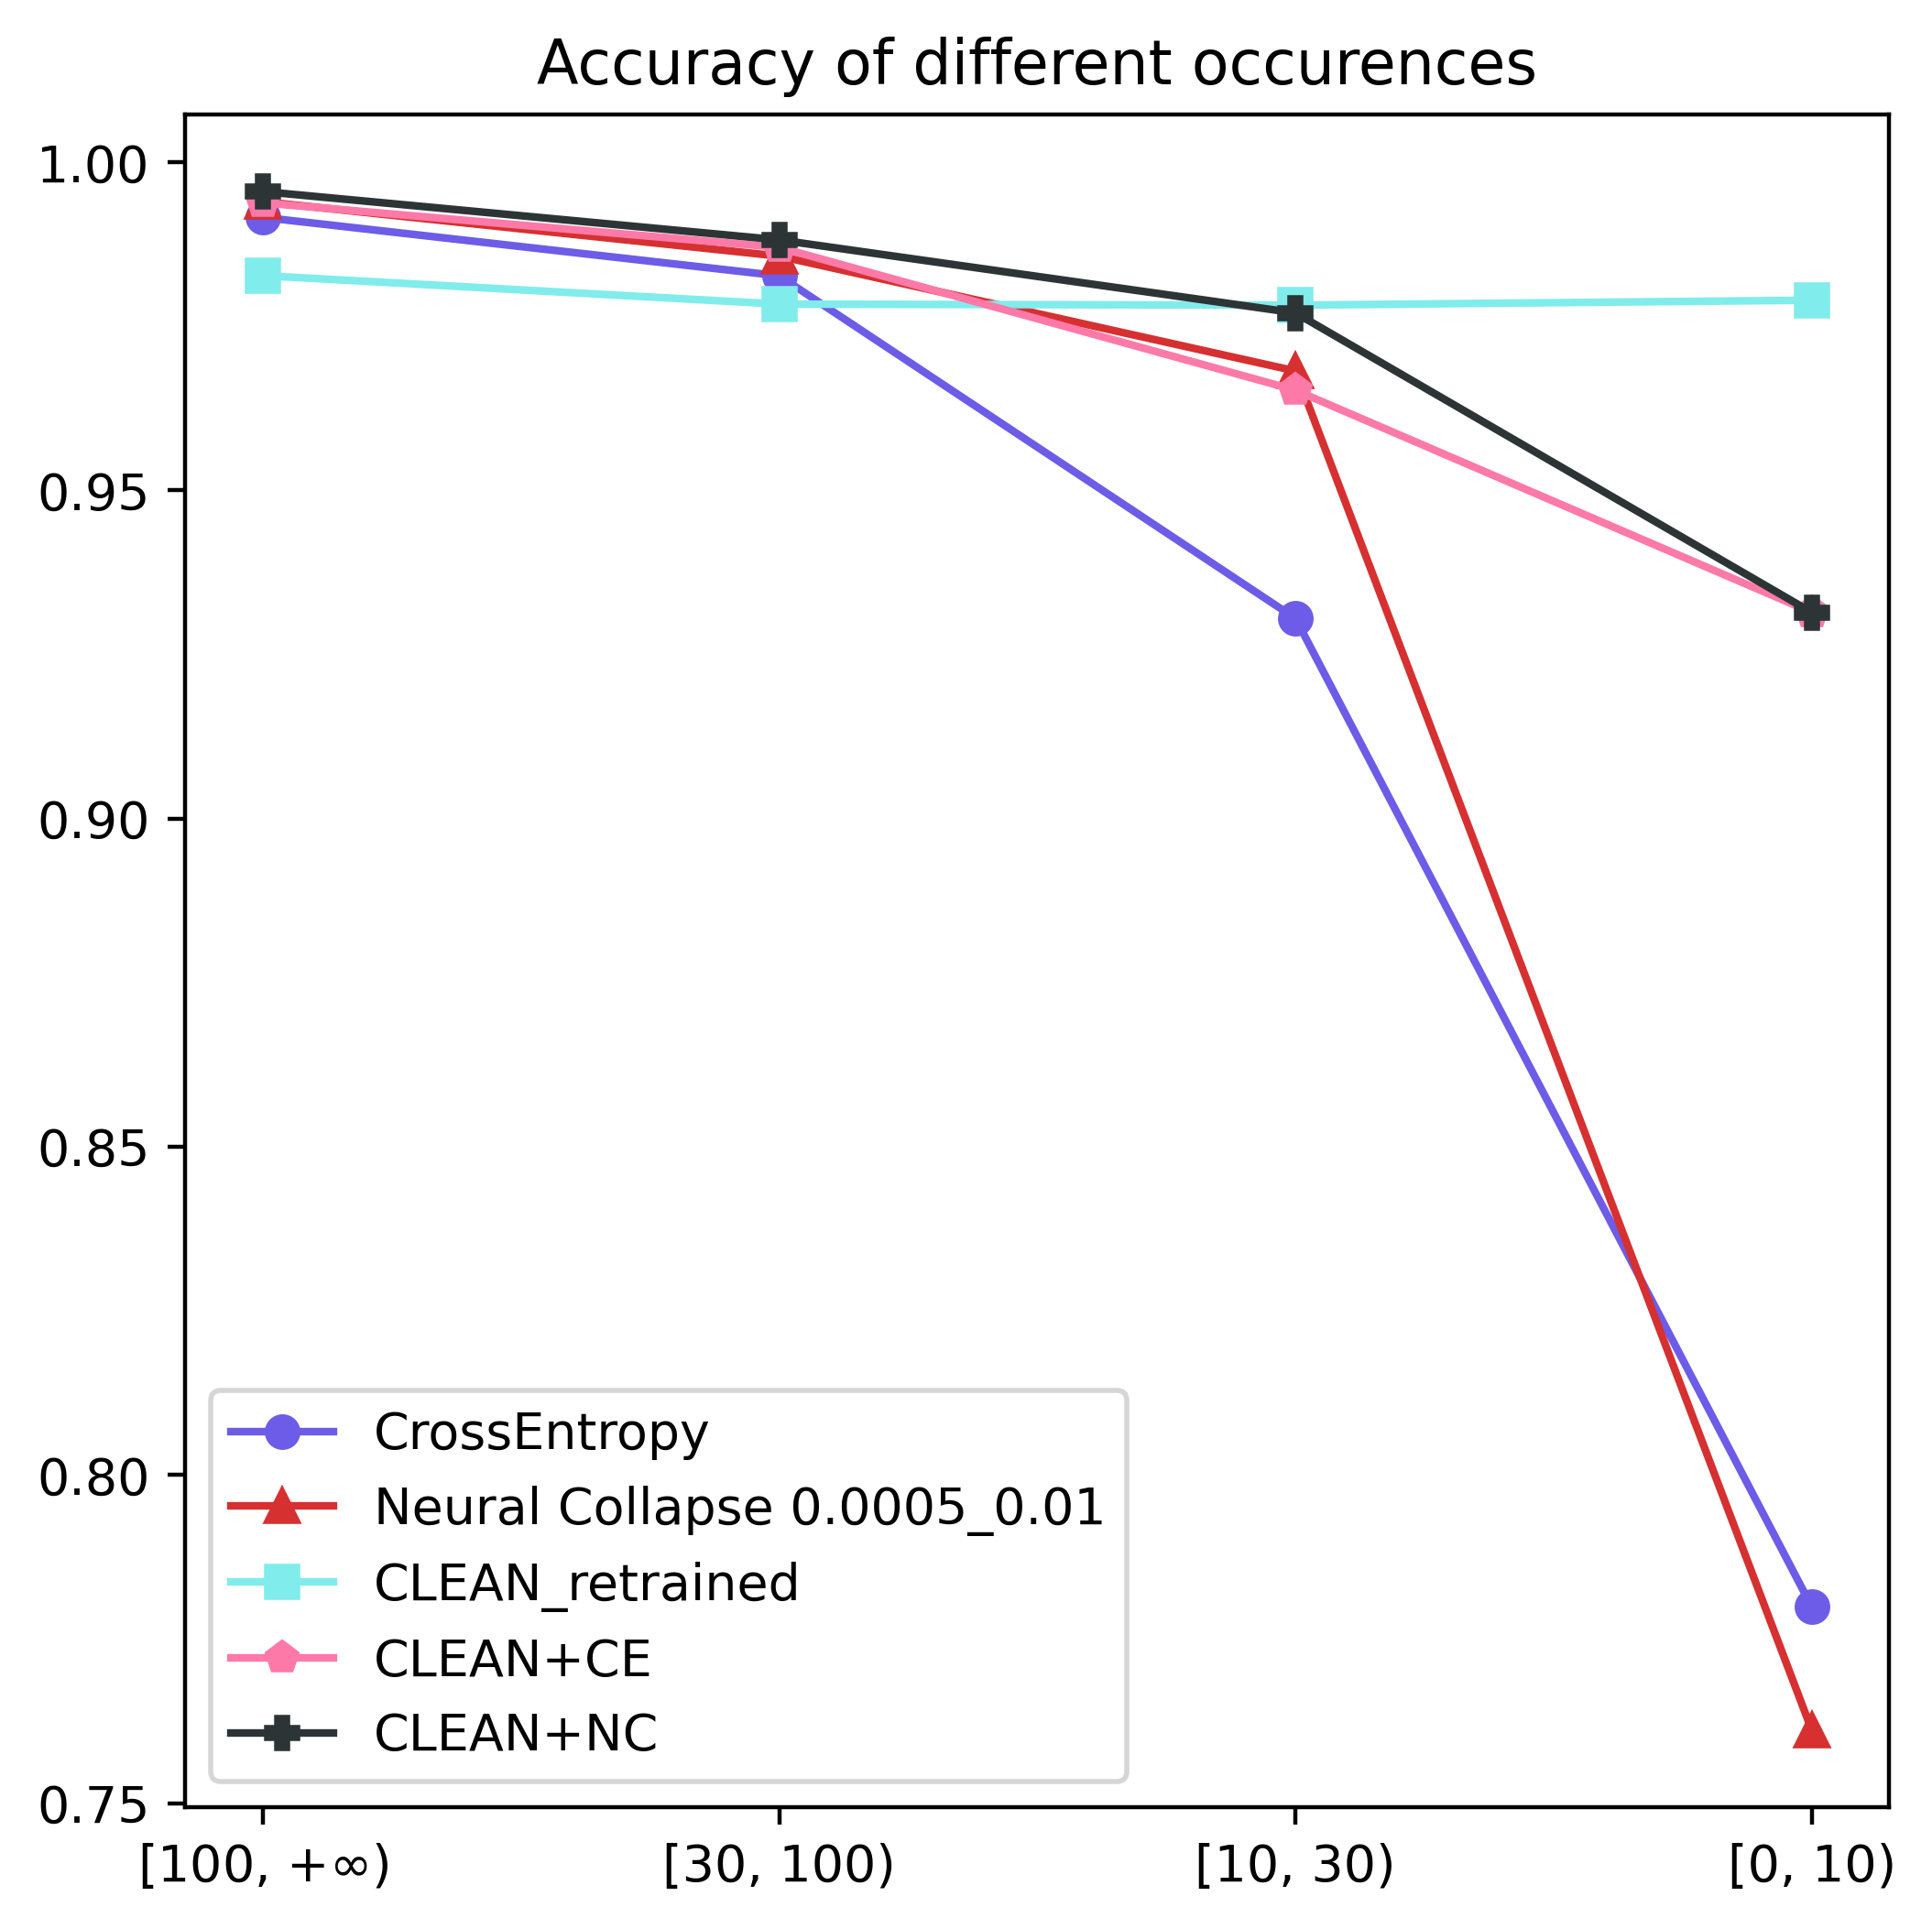

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 0.7799	0.9305	0.9827	0.9916 reverse order
CE_results = np.array([0.9916, 0.9827, 0.9305, 0.7799])
# 0.7611	0.9682	0.9857	0.994
NC_results = np.array([0.994, 0.9857, 0.9682, 0.7611])
# {"[100, +$\\infty$)": 0.9827226261608235, "[30, 100)": 0.9783845278725825, "[10, 30)": 0.9782224838140082, "[0, 10)": 0.9789823008849557}
CLEAN_results = np.array([0.9827226261608235, 0.9783845278725825, 0.9782224838140082, 0.9789823008849557])
# {"[100, +$\\infty$)": 0.9938089410409617, "[30, 100)": 0.9870307167235495, "[10, 30)": 0.9652736904061212, "[0, 10)": 0.9314159292035398}
CLEAN_CE_results = np.array([0.9938089410409617, 0.9870307167235495, 0.9652736904061212, 0.9314159292035398])
# {"[100, +$\\infty$)": 0.9955366784248795, "[30, 100)": 0.9881683731513083, "[10, 30)": 0.9770453207769276, "[0, 10)": 0.9314159292035398}
CLEAN_NC_results = np.array([0.9955366784248795, 0.9881683731513083, 0.9770453207769276, 0.9314159292035398])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_results - CE_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
ax.plot(NC_results, label='Neural Collapse 0.0005_0.01', marker='^', color='#d63031')
ax.plot(CLEAN_results, label='CLEAN_retrained', marker='s', color='#81ecec')
ax.plot(CLEAN_CE_results, label='CLEAN+CE', marker='p', color='#fd79a8')
ax.plot(CLEAN_NC_results, label='CLEAN+NC', marker='P', color='#2d3436')
# for i in range(len(diff)):
#     ax.text(i+0.2, NC_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Accuracy of different occurences')

plt.show()

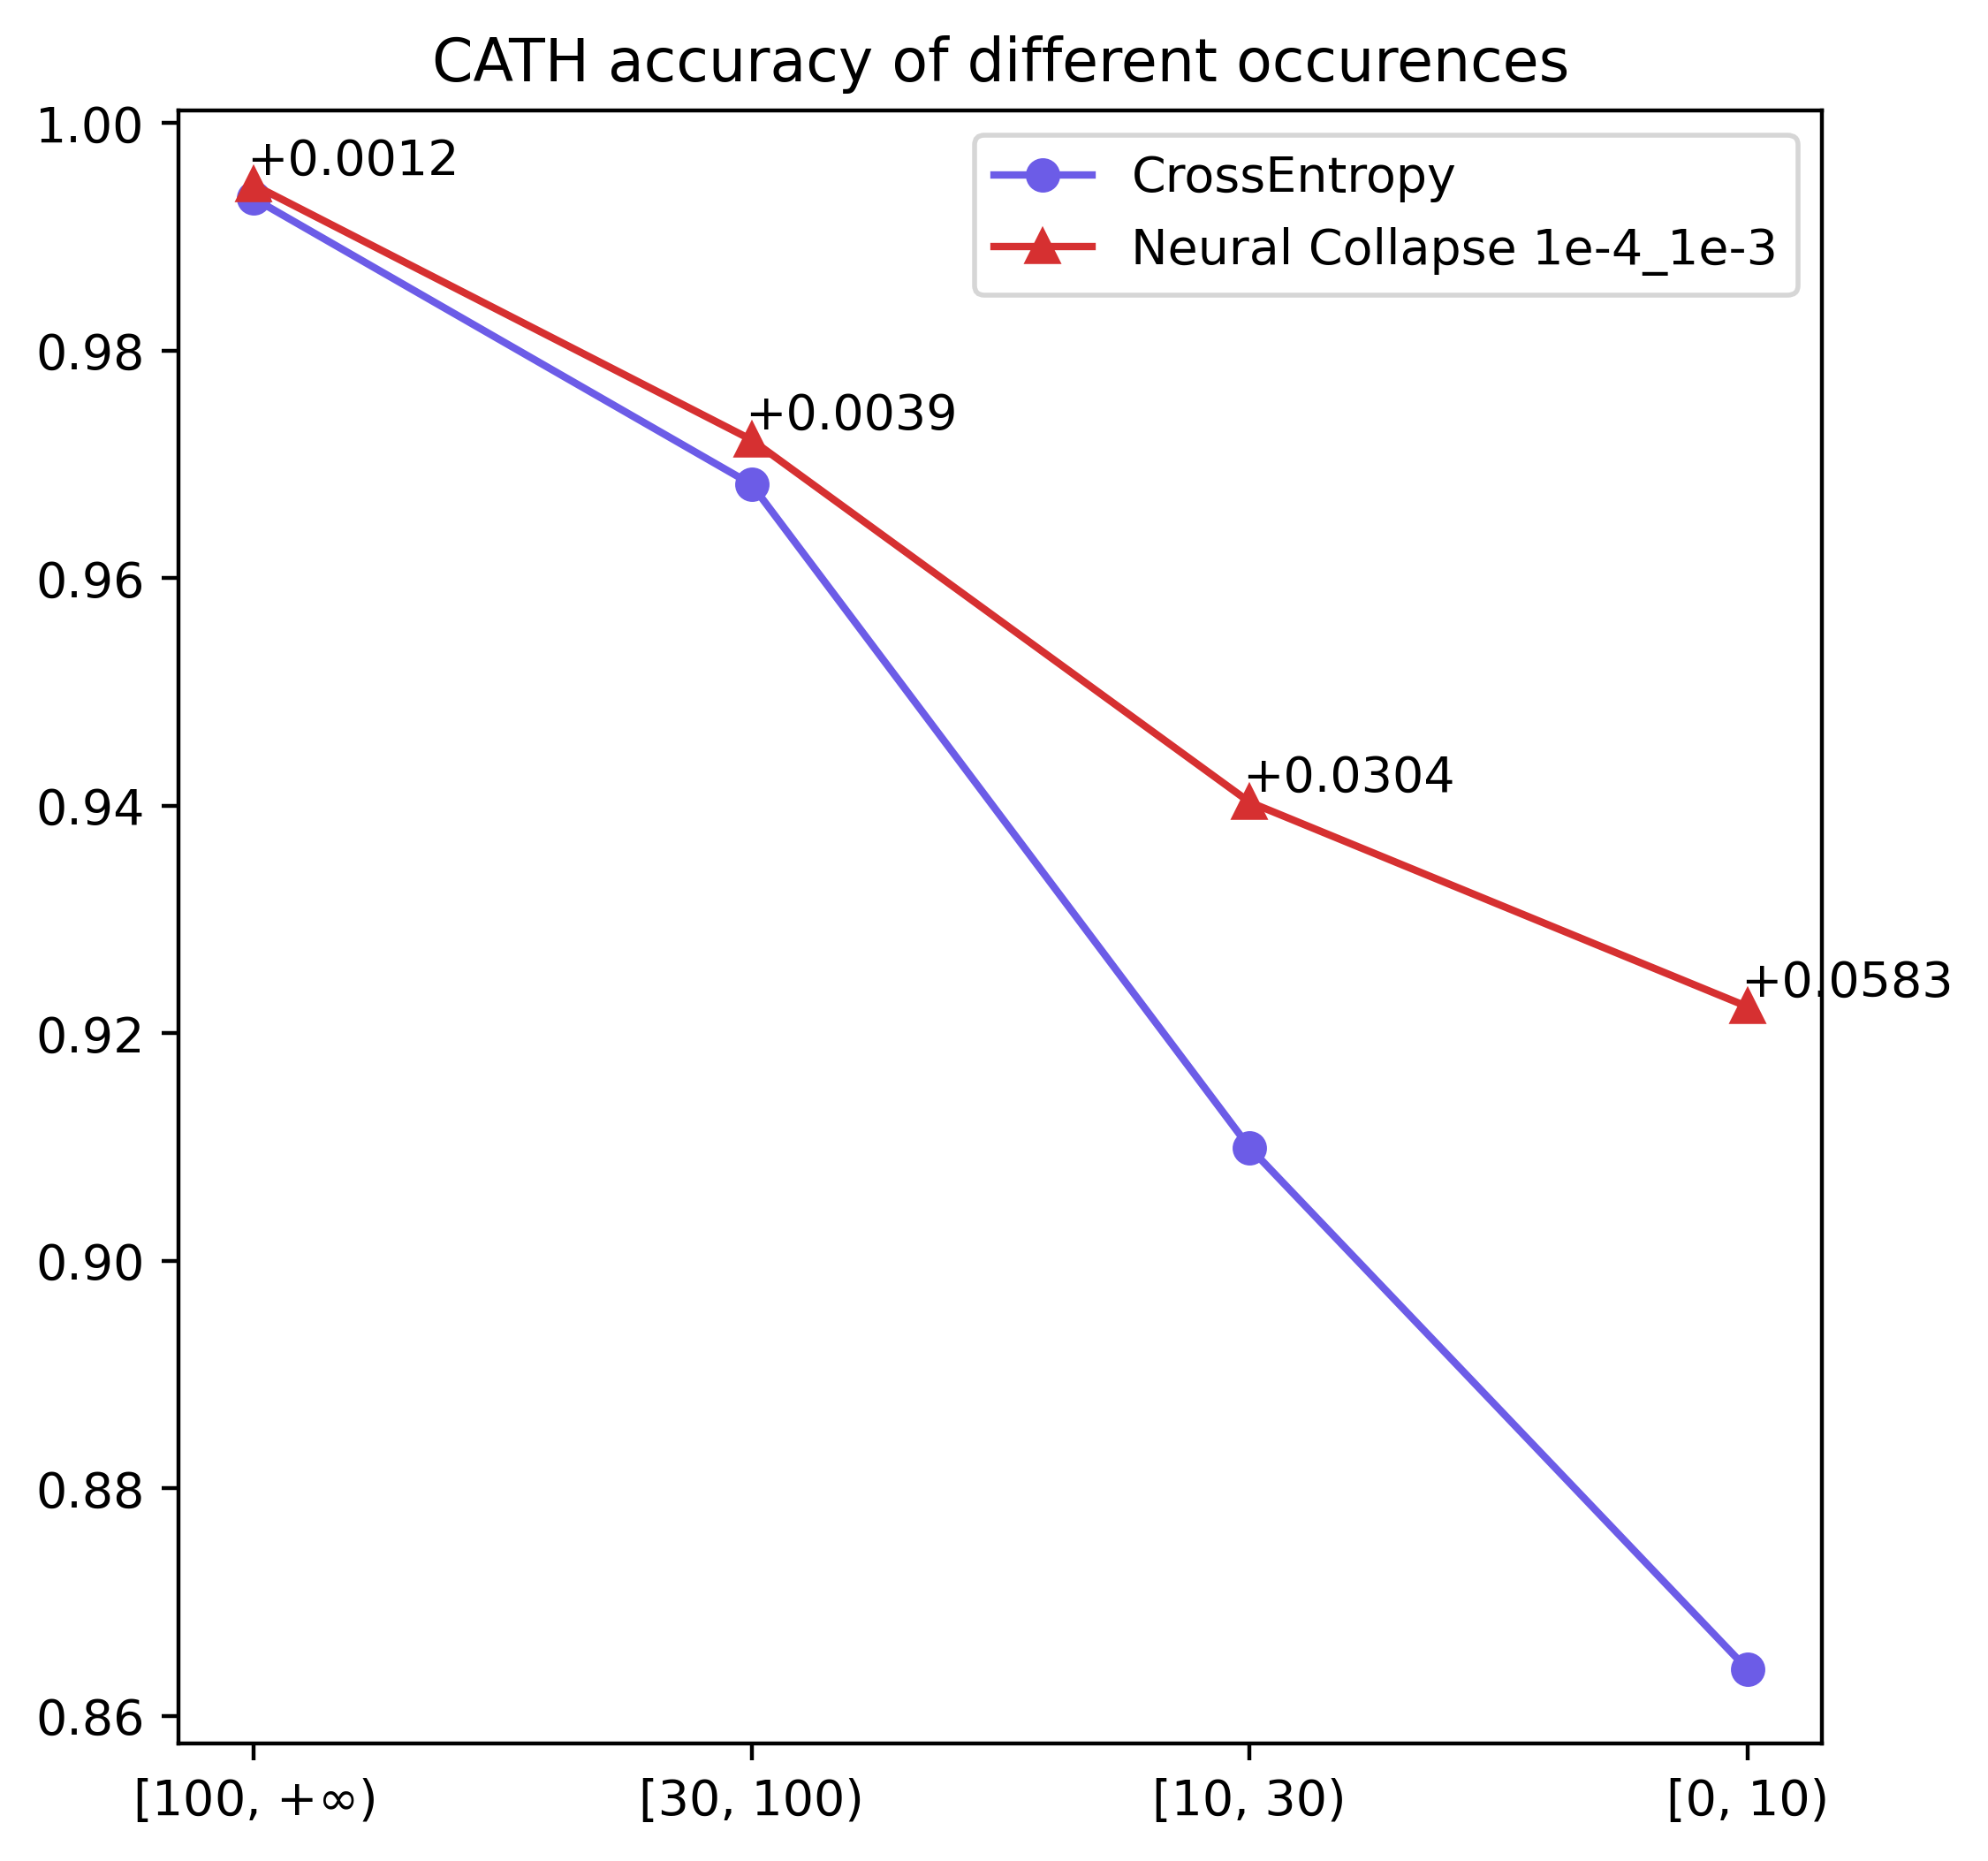

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# {"[100, +$\\infty$)": 0.9933951479740887, "[30, 100)": 0.9682470639408438, "[10, 30)": 0.9099476439790576, "[0, 10)": 0.8640776699029126}
CE_results = np.array([0.9933951479740887, 0.9682470639408438, 0.9099476439790576, 0.8640776699029126])
# {"[100, +$\\infty$)": 0.9945806342351496, "[30, 100)": 0.9721618094823836, "[10, 30)": 0.9403141361256544, "[0, 10)": 0.9223300970873787}
NC_results = np.array([0.9945806342351496, 0.9721618094823836, 0.9403141361256544, 0.9223300970873787])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_results - CE_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
ax.plot(NC_results, label='Neural Collapse 1e-4_1e-3', marker='^', color='#d63031')
for i in range(len(diff)):
    ax.text(i+0.2, NC_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('CATH accuracy of different occurences')

plt.show()

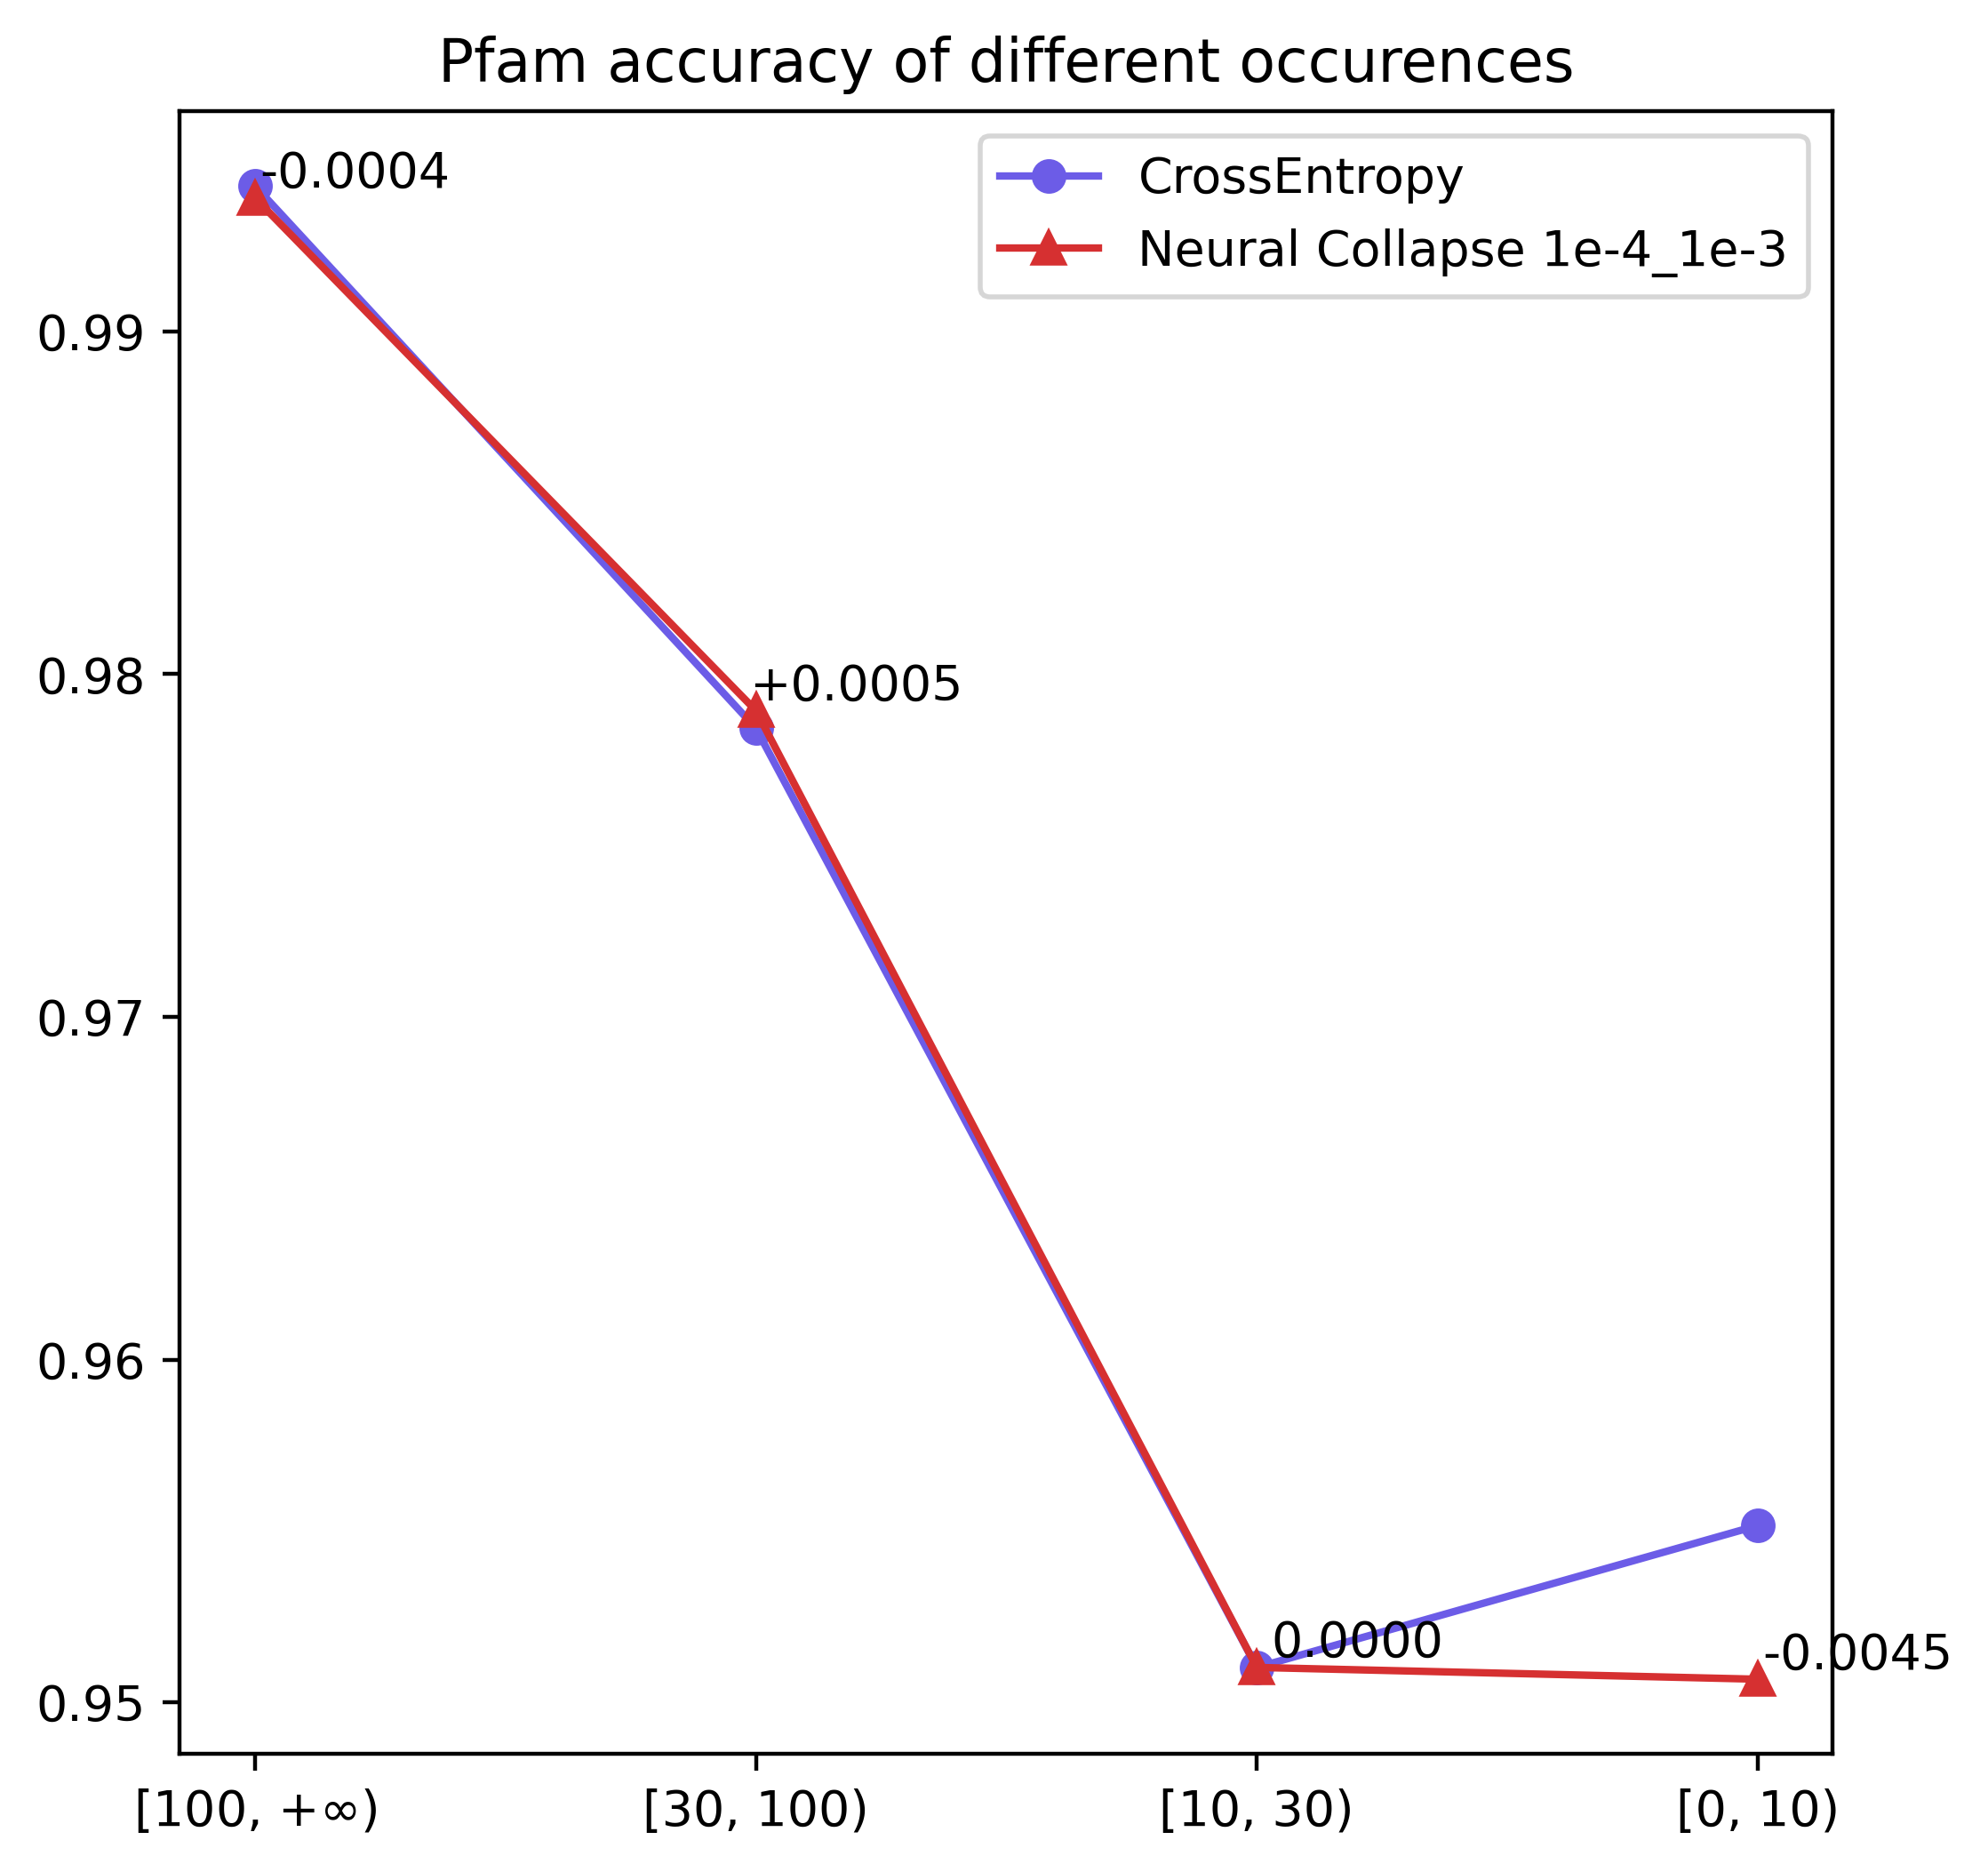

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# {"[100, +$\\infty$)": 0.9942480790340286, "[30, 100)": 0.9784246575342466, "[10, 30)": 0.9510163278907031, "[0, 10)": 0.9551569506726457}
CE_results = np.array([0.9942480790340286, 0.9784246575342466, 0.9510163278907031, 0.9551569506726457])
# {"[100, +$\\infty$)": 0.9938968166849615, "[30, 100)": 0.9789383561643835, "[10, 30)": 0.9510163278907031, "[0, 10)": 0.9506726457399103}
NC_results = np.array([0.9938968166849615, 0.9789383561643835, 0.9510163278907031, 0.9506726457399103])

xsticks = ['[100, +$\infty$)', '[30, 100)', '[10, 30)', '[0, 10)']
diff = NC_results - CE_results

fig, ax = plt.subplots(figsize=(6, 6), dpi=400)
ax.plot(CE_results, label='CrossEntropy', marker='o', color='#6c5ce7')
ax.plot(NC_results, label='Neural Collapse 1e-4_1e-3', marker='^', color='#d63031')
for i in range(len(diff)):
    ax.text(i+0.2, NC_results[i], f'{"+" if diff[i] > 0 else ""}{diff[i]:.4f}', ha='center', va='bottom')
ax.legend()
ax.set_xticks(range(len(xsticks)), xsticks)
ax.set_title('Pfam accuracy of different occurences')

plt.show()